In [139]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import tqdm
import psycopg2
import sqlalchemy
import pandas as pd 

In [140]:
# conn = psycopg2.connect("host=localhost dbname=gradient_local user=postgres") 
# cursor = conn.cursor()

db_uri = "postgresql://postgres:@localhost/gradient_local"

get_items_query = "SELECT * FROM items;"
get_users_query = "SELECT * FROM users;"
get_fct_query = "SET constraint_exclusion = on; SELECT * FROM fct_hourly_metric;"

In [141]:
items_df = pd.read_sql(get_items_query, db_uri)
items_df.head()

,item_key,created_at,user_id,bucket_key,type
0,d6a9a727-3c39-41bc-a46a-1027a85a0fac,2023-07-14 14:35:37,24549,tiny-texts-jk9apq,txt
1,24153e9f-c757-448a-b854-ade8b23feff5,2023-07-14 14:35:25,32109,tiny-images-jk9apq,img
2,5921d0f8-8989-495d-bf28-247743063659,2023-07-14 14:33:48,33961,tiny-texts-jk9apq,txt
3,fdc57820-5a49-4467-b8ce-44e814948d0e,2023-07-14 14:31:47,2295,tiny-texts-jk9apq,txt
4,e14c4b33-b1e5-42a4-920d-b1c10a5a5545,2023-07-14 14:31:02,26137,tiny-images-jk9apq,img


In [142]:
users_df = pd.read_sql(get_users_query, db_uri)
users_df.head()

,id,gender,country,age
0,1,male,AlgoBay,40.0
1,2,female,GraphTown,19.0
2,3,female,BayesianBourg,7.0
3,4,male,AdaLove,21.0
4,36,male,AlgoBay,26.0


In [143]:
fct_df = pd.read_sql(get_fct_query, db_uri)
fct_df.head()

,date_stamp,time_stamp,evnt_stamp,user_id,item_id,evt_type,session_id
0,2023-07-25,2023-07-25 13:00:00,1690291720,24473.0,ab1419f7-6789-4d2a-ae0a-b6ffcc58adfd,view,29e43e40-44cf-4f79-9b0d-076f3cb66c43
1,2023-07-25,2023-07-25 13:00:00,1690291725,24473.0,1a0f6282-8874-432c-813a-a8daa3021e55,view,29e43e40-44cf-4f79-9b0d-076f3cb66c43
2,2023-07-25,2023-07-25 13:00:00,1690291725,24473.0,fd760756-961b-4e12-8d75-090902e74921,view,29e43e40-44cf-4f79-9b0d-076f3cb66c43
3,2023-07-25,2023-07-25 13:00:00,1690291725,24473.0,None,stop,29e43e40-44cf-4f79-9b0d-076f3cb66c43
4,2023-07-25,2023-07-25 13:00:00,1690291729,19301.0,f1b4453a-1048-46a2-9d54-bd37571a7e6f,view,c18e3c3e-a5c1-4f9a-b78e-f9a104ded275


In [144]:
view_frequency_query = "SELECT item_id, COUNT(*) as views_count FROM fct_hourly_metric WHERE evt_type = 'view' GROUP BY item_id;"
df_view_frequency = pd.read_sql(view_frequency_query, db_uri)
df_view_frequency.head()


,item_id,views_count
0,00029807-6732-4750-8de3-397174e6a79c,1
1,0002c87a-604a-44f3-a003-1379ca1eed86,2
2,00030cae-5f09-4cc7-8e89-049ffaa61983,1
3,0007a513-4b29-4529-b001-43e78a7ba195,1
4,000ab8dd-71c7-4b56-93b4-3d3f7e513541,1


In [145]:
print(df_view_frequency.shape)
df_view_frequency.describe()

(17133, 2)


,views_count
count,17133.000000
mean,1.061752
std,0.254158
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [146]:
items_check_query = "SELECT COUNT(*) FROM fct_hourly_metric WHERE evt_type = 'view' AND item_id = 'd2777c58-1474-4891-b195-0bcb2ac37f56';"
df_items_check = pd.read_sql(items_check_query, db_uri)
df_items_check.head()

,count
0,4


We have confirmed that the maximum

[1 2 3 4]


/var/folders/0y/d_717f6d3wv7j3stmqzgt9_c0000gp/T/ipykernel_65740/957434070.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict={'horizontalalignment': 'center'})


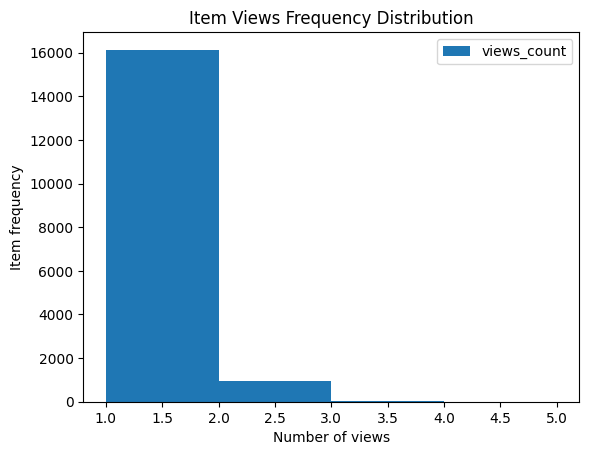

In [169]:
ax = df_view_frequency.plot.hist(x='item_id',y='views_count', bins=np.arange(df_view_frequency['views_count'].min(), df_view_frequency['views_count'].max()+2))

print(np.arange(df_view_frequency['views_count'].min(), df_view_frequency['views_count'].max()+1, 1))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), fontdict={'horizontalalignment': 'center'})
plt.ylabel('Item frequency')
plt.xlabel('Number of views')
plt.title('Item Views Frequency Distribution')
plt.show()